In [2]:
import pandas as pd
import numpy as np

In [3]:
#1 - Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.
customer=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 3 - Insurance Claims Case Study (7)\cust_demographics.csv')
customer

,CUST_ID,gender,DateOfBirth,State,Contact,Segment
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver
3,47830476,Female,01-May-86,MA,413-187-7945,Silver
4,19269962,Male,13-May-77,NV,956-871-8691,Gold
...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver


In [4]:
claim=pd.read_csv(r'C:\Users\Chinthana\Desktop\Analytix Labs\Case Studies\Python\Python Foundation Case Study 3 - Insurance Claims Case Study (7)\claims.csv')
claim

,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
4,22890252,19269962,Crime,01/13/2018,Auto,No,Material only,$2680,1.0,No
...,...,...,...,...,...,...,...,...,...,...
1095,97727122,35951012,Other driver error,06/11/2017,Auto,No,Material only,$3059,4.0,Yes
1096,10247193,14818669,Natural causes,03/14/2018,Auto,No,Material only,$1520,2.0,No
1097,79807493,85322831,Other driver error,02/09/2018,Auto,No,Material and injury,$23575,2.0,Yes
1098,69299345,73449366,Other causes,03/21/2018,Auto,Unknown,Material and injury,$25120,1.0,No


In [5]:
cust_claim360= pd.merge(customer, claim, left_on='CUST_ID', right_on='customer_id', how='inner')
cust_claim360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No


In [6]:
#2 - Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their business significance.
cust_claim360.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1085 entries, 0 to 1084
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   CUST_ID              1085 non-null   int64  
 1   gender               1085 non-null   object 
 2   DateOfBirth          1085 non-null   object 
 3   State                1085 non-null   object 
 4   Contact              1085 non-null   object 
 5   Segment              1085 non-null   object 
 6   claim_id             1085 non-null   int64  
 7   customer_id          1085 non-null   int64  
 8   incident_cause       1085 non-null   object 
 9   claim_date           1085 non-null   object 
 10  claim_area           1085 non-null   object 
 11  police_report        1085 non-null   object 
 12  claim_type           1085 non-null   object 
 13  claim_amount         1020 non-null   object 
 14  total_policy_claims  1075 non-null   float64
 15  fraudulent           1085 non-null   o

In [7]:
cust_claim360.head()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
0,21868593,Female,12-Jan-79,VT,789-916-8172,Platinum,54004764,21868593,Driver error,11/27/2017,Auto,No,Material only,$2980,1.0,No
1,75740424,Female,13-Jan-70,ME,265-543-1264,Silver,33985796,75740424,Crime,10/03/2018,Home,Unknown,Material only,$2980,3.0,No
2,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,53522022,30308357,Other driver error,02/02/2018,Auto,No,Material only,$3369.5,1.0,Yes
3,30308357,Female,11-Mar-84,TN,798-631-4758,Silver,63017412,30308357,Driver error,04/04/2018,Auto,No,Material only,$1950,6.0,No
4,47830476,Female,01-May-86,MA,413-187-7945,Silver,13015401,47830476,Natural causes,06/17/2018,Auto,No,Material only,$1680,1.0,No


In [8]:
cust_claim360.describe()

,CUST_ID,claim_id,customer_id,total_policy_claims
count,1.085000e+03,1.085000e+03,1.085000e+03,1075.000000
mean,5.076790e+07,4.891553e+07,5.076790e+07,1.586977
std,2.849625e+07,2.912818e+07,2.849625e+07,1.146859
min,1.545570e+05,2.683200e+04,1.545570e+05,1.000000
25%,2.645062e+07,2.404606e+07,2.645062e+07,1.000000
50%,4.975949e+07,4.855975e+07,4.975949e+07,1.000000
75%,7.609396e+07,7.404400e+07,7.609396e+07,2.000000
max,9.996199e+07,9.977548e+07,9.996199e+07,8.000000


In [9]:
cust_claim360.tail()

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent
1080,79539873,Female,15-Mar-81,ND,459-425-4319,Platinum,62020796,79539873,Other driver error,09/06/2018,Auto,Yes,Material only,$1770,1.0,No
1081,42364152,Female,07-Jul-96,ID,529-462-1635,Silver,63269067,42364152,Other causes,05/09/2017,Home,No,Material only,$2800,1.0,No
1082,19888166,Male,11-Apr-90,WI,712-651-9613,Gold,22690595,19888166,Other driver error,05/15/2017,Auto,Yes,Injury only,$33080,2.0,No
1083,11256802,Female,22-Oct-64,LA,469-345-5617,Silver,12376894,11256802,Other driver error,04/18/2017,Auto,No,Material only,$2840,4.0,No
1084,61575264,Male,12-Jul-95,WY,182-385-1392,Gold,63226031,61575264,Natural causes,03/16/2017,Auto,No,Material only,$1490,1.0,No


In [10]:
cust_claim360.columns

Index(['CUST_ID', 'gender', 'DateOfBirth', 'State', 'Contact', 'Segment',
       'claim_id', 'customer_id', 'incident_cause', 'claim_date', 'claim_area',
       'police_report', 'claim_type', 'claim_amount', 'total_policy_claims',
       'fraudulent'],
      dtype='object')

In [11]:
cust_claim360.size

17360

In [12]:
cust_claim360.dtypes

CUST_ID                  int64
gender                  object
DateOfBirth             object
State                   object
Contact                 object
Segment                 object
claim_id                 int64
customer_id              int64
incident_cause          object
claim_date              object
claim_area              object
police_report           object
claim_type              object
claim_amount            object
total_policy_claims    float64
fraudulent              object
dtype: object

In [13]:
def date(x):
    if x[-2:]<='70':
        x= x.replace(x[-2:], '19'+x[-2:])
    return x

In [14]:
#cust_claim360['DateOfBirth'].astype('str').apply(lambda x:x[-2:].replace(('19'+x[-2:])) if x[-2:]<=70 else x[-2:])

In [15]:
#2- applying udf to the values of DateOfBirth column
cust_claim360['DateOfBirth']=cust_claim360['DateOfBirth'].astype('str').apply(date)
cust_claim360['DateOfBirth']

0         12-Jan-79
1       13-Jan-1970
2         11-Mar-84
3         11-Mar-84
4         01-May-86
           ...     
1080      15-Mar-81
1081      07-Jul-96
1082      11-Apr-90
1083    22-Oct-1964
1084      12-Jul-95
Name: DateOfBirth, Length: 1085, dtype: object

In [16]:
#2- changing the datatype of DateOfBirth from str to datetime64
cust_claim360['DateOfBirth']=pd.to_datetime(cust_claim360['DateOfBirth'])
cust_claim360['DateOfBirth']


0      1979-01-12
1      1970-01-13
2      1984-03-11
3      1984-03-11
4      1986-05-01
          ...    
1080   1981-03-15
1081   1996-07-07
1082   1990-04-11
1083   1964-10-22
1084   1995-07-12
Name: DateOfBirth, Length: 1085, dtype: datetime64[ns]

In [17]:
cust_claim360.dtypes

CUST_ID                         int64
gender                         object
DateOfBirth            datetime64[ns]
State                          object
Contact                        object
Segment                        object
claim_id                        int64
customer_id                     int64
incident_cause                 object
claim_date                     object
claim_area                     object
police_report                  object
claim_type                     object
claim_amount                   object
total_policy_claims           float64
fraudulent                     object
dtype: object

In [18]:
cust_claim360['claim_date']=pd.to_datetime(cust_claim360['claim_date'])
cust_claim360['claim_date']

0      2017-11-27
1      2018-10-03
2      2018-02-02
3      2018-04-04
4      2018-06-17
          ...    
1080   2018-09-06
1081   2017-05-09
1082   2017-05-15
1083   2017-04-18
1084   2017-03-16
Name: claim_date, Length: 1085, dtype: datetime64[ns]

In [19]:
#3 - Convert the column claim_amount to numeric. Use the appropriate modules/attributes to remove the $ sign.
cust_claim360['claim_amount']=cust_claim360.claim_amount.apply(lambda x:str(x).replace('$', '')).astype('float64')
cust_claim360['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [22]:
#4 - Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.
cust_claim360['flag']=np.where(((cust_claim360['claim_type']=='Injury only') & (cust_claim360['police_report']=='No')), 1, 0)
cust_claim360['flag']

0       0
1       0
2       0
3       0
4       0
       ..
1080    0
1081    0
1082    0
1083    0
1084    0
Name: flag, Length: 1085, dtype: int32

In [23]:
#5 - One customer can claim for insurance more than once and in each claim,multiple categories of claims can be involved. However, customer ID should remain unique. 
#Retain the most recent observation and delete any duplicated records in the data based on the customer ID column.

cust_claim360=cust_claim360.sort_values(by='claim_date', ascending=False)
cust_claim360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
286,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
354,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
1055,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
322,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1
195,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


In [24]:
cust_claim360=cust_claim360.drop_duplicates(subset='customer_id', keep='first')
cust_claim360

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag
286,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0
354,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0
1055,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0
322,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,NaN,2.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1
195,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0


In [20]:
#6 - Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)
cust_claim360.isna().sum()

CUST_ID                 0
gender                  0
DateOfBirth             0
State                   0
Contact                 0
Segment                 0
claim_id                0
customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
dtype: int64

In [21]:
cust_claim360['total_policy_claims']=cust_claim360.total_policy_claims.fillna(cust_claim360.total_policy_claims.mode()[0])
cust_claim360['total_policy_claims']

0       1.0
1       3.0
2       1.0
3       6.0
4       1.0
       ... 
1080    1.0
1081    1.0
1082    2.0
1083    4.0
1084    1.0
Name: total_policy_claims, Length: 1085, dtype: float64

In [22]:
cust_claim360['claim_amount']=cust_claim360.claim_amount.fillna(cust_claim360.claim_amount.mean())
cust_claim360['claim_amount']

0        2980.0
1        2980.0
2        3369.5
3        1950.0
4        1680.0
         ...   
1080     1770.0
1081     2800.0
1082    33080.0
1083     2840.0
1084     1490.0
Name: claim_amount, Length: 1085, dtype: float64

In [23]:
cust_claim360.isna().sum()

CUST_ID                0
gender                 0
DateOfBirth            0
State                  0
Contact                0
Segment                0
claim_id               0
customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
dtype: int64

In [22]:
import datetime as dt

In [32]:
#7 - Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
#Children < 18
#Youth 18-30
#Adult 30-60
#Senior > 60

cust_claim360['age']=round((cust_claim360.claim_date.max()-cust_claim360['DateOfBirth']).dt.days/365)
cust_claim360

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11612\62431805.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim360['age']=round((cust_claim360.claim_date.max()-cust_claim360['DateOfBirth']).dt.days/365)


,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age
286,93915431,Male,1967-09-08,ME,134-785-1687,Gold,99775483,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.5,1.0,Yes,0,51.0
354,38011078,Female,1976-05-20,NE,271-123-1475,Gold,98795403,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.0,1.0,No,0,42.0
1055,58451506,Male,1968-04-22,FL,673-574-7823,Gold,43042986,58451506,Natural causes,2018-10-30,Auto,No,Material only,2420.0,1.0,No,0,51.0
941,46710738,Male,1977-04-28,MO,962-834-9361,Gold,74761374,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.0,1.0,No,0,42.0
322,77510822,Female,1986-03-18,AK,436-934-7156,Silver,87329176,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,1630.0,2.0,No,0,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
231,77219712,Female,1999-08-05,NH,649-592-8793,Platinum,61374372,77219712,Other causes,2017-01-01,Auto,No,Material and injury,20200.0,1.0,No,0,19.0
905,42664554,Female,1993-08-13,TN,396-973-2531,Gold,42280334,42664554,Other causes,2017-01-01,Auto,No,Injury only,27670.0,1.0,No,1,25.0
195,64840478,Female,1974-02-14,NM,918-174-7461,Silver,23636125,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.0,1.0,No,0,45.0
177,74155265,Male,1985-11-16,TX,392-739-4873,Gold,25647821,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.0,1.0,No,0,33.0


In [33]:
cust_claim360['age']=cust_claim360.age.astype('int')
cust_claim360['age']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11612\3127015658.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim360['age']=cust_claim360.age.astype('int')


286     51
354     42
1055    51
941     42
322     33
        ..
231     19
905     25
195     45
177     33
181     24
Name: age, Length: 1078, dtype: int32

In [34]:
cust_claim360['age_category']=np.where(cust_claim360['age']<18, 'Children', np.where(cust_claim360['age']<30, 'Youth',np.where(cust_claim360['age']<60, 'Adult', 'Senior')))
cust_claim360['age_category']

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_11612\3383181131.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cust_claim360['age_category']=np.where(cust_claim360['age']<18, 'Children', np.where(cust_claim360['age']<30, 'Youth',np.where(cust_claim360['age']<60, 'Adult', 'Senior')))


286     Adult
354     Adult
1055    Adult
941     Adult
322     Adult
        ...  
231     Youth
905     Youth
195     Adult
177     Adult
181     Youth
Name: age_category, Length: 1078, dtype: object

In [35]:
#8 - What is the average amount claimed by the customers from various segments?
cust_claim360[['Segment', 'claim_amount']].groupby('Segment').agg(np.mean)

,claim_amount
Segment,
Gold,12201.715633
Platinum,11919.921053
Silver,11388.066474


In [68]:
cust_claim360.claim_date

286    2018-10-30
354    2018-10-30
1055   2018-10-30
941    2018-10-30
322    2018-10-30
          ...    
231    2017-01-01
905    2017-01-01
195    2017-01-01
177    2017-01-01
181    2017-01-01
Name: claim_date, Length: 1078, dtype: datetime64[ns]

In [69]:
#9 - What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.
cust_claim360[(cust_claim360.claim_date<'2018-09-10')][['incident_cause', 'claim_amount']].groupby('incident_cause').agg(np.sum)

,claim_amount
incident_cause,
Crime,667580.0
Driver error,3185390.0
Natural causes,1215141.5
Other causes,3516589.0
Other driver error,3136204.0


In [38]:
#10 - How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 
cust_claim360['age_category'][((cust_claim360.age_category=='Adult') & ((cust_claim360.State=='TX') | (cust_claim360.State=='DE') | (cust_claim360.State=='AK')) & (cust_claim360.incident_cause.str.contains('driver', case=False)))].count()

25

In [39]:
import matplotlib.pyplot as plt
%matplotlib inline

In [45]:
#11 - Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage onthe pie chart.
seg_gen=pd.pivot_table(data=cust_claim360, index=['Segment', 'gender'], values='claim_amount', aggfunc=np.sum)
seg_gen

claim_amount
Segment  gender              
Gold     Female     2012199.0
         Male       2514637.5
Platinum Female     2293620.0
         Male       2009471.5
Silver   Female     1756212.5
         Male       2184058.5

array([<AxesSubplot:ylabel='claim_amount'>], dtype=object)

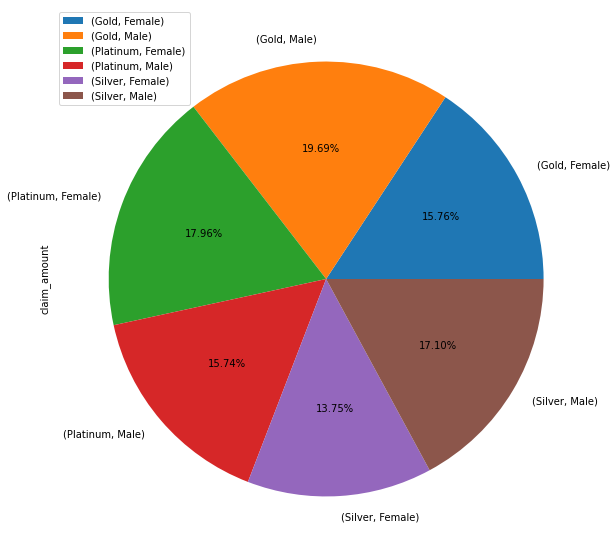

In [97]:
#11
seg_gen.plot(kind='pie', autopct='%.2f%%',subplots=True, figsize=(16,10))

In [49]:
#12 - Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart
gender_driver_claim=cust_claim360[cust_claim360.incident_cause.str.contains('driver', case=False)][['gender', 'claim_id']].groupby('gender').count().add_prefix('count_of_driver_related_')
gender_driver_claim

,count_of_driver_related_claim_id
gender,
Female,221
Male,281


In [50]:
gender_notdriver_claim=cust_claim360[~cust_claim360.incident_cause.str.contains('driver', case=False)][['gender', 'claim_id']].groupby('gender').count().add_prefix('count_of_nondriver_related_')
gender_notdriver_claim

,count_of_nondriver_related_claim_id
gender,
Female,306
Male,270


In [51]:
gender_wise_countOfclaim=pd.concat([gender_driver_claim, gender_notdriver_claim], axis=1)

<AxesSubplot:xlabel='gender'>

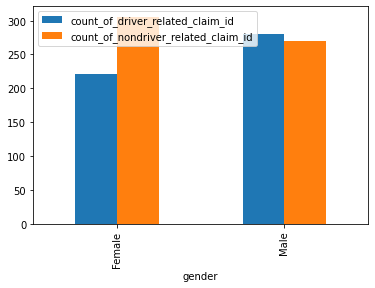

In [52]:
gender_wise_countOfclaim.plot(kind='bar')

<AxesSubplot:xlabel='gender'>

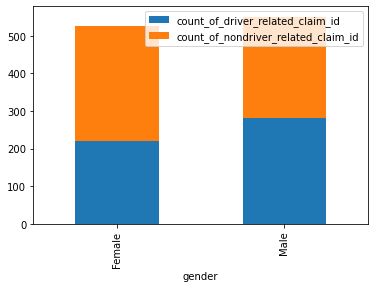

In [53]:
gender_wise_countOfclaim.plot(kind='bar', stacked=True)

In [54]:
#13 - Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.
fraud=cust_claim360[cust_claim360.fraudulent=='Yes'][['age_category', 'claim_id']].groupby('age_category').count().add_prefix('count_of_fraud_')
fraud

,count_of_fraud_claim_id
age_category,
Adult,171
Children,8
Youth,66


In [55]:
not_fraud=cust_claim360[cust_claim360.fraudulent=='No'][['age_category', 'claim_id']].groupby('age_category').count().add_prefix('count_of_nonfraud_')
not_fraud

,count_of_nonfraud_claim_id
age_category,
Adult,579
Children,22
Youth,232


In [56]:
fraud_age_wise=pd.concat([fraud, not_fraud], axis=1)
fraud_age_wise

,count_of_fraud_claim_id,count_of_nonfraud_claim_id
age_category,,
Adult,171,579
Children,8,22
Youth,66,232


<AxesSubplot:xlabel='age_category'>

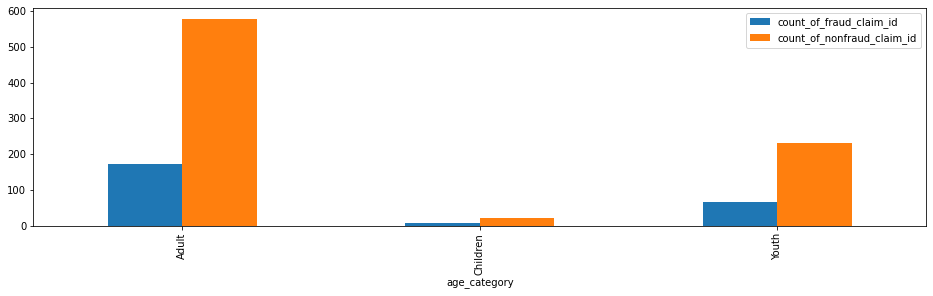

In [59]:
#13
fraud_age_wise.plot(kind='bar', figsize=(16,4))

In [36]:
import datetime as dt

In [42]:
#14 - Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 
monthwise_sum0f_claimamount=pd.pivot_table(data=cust_claim360, index=cust_claim360.claim_date.dt.month_name(), values='claim_amount', aggfunc=np.sum).reset_index()
monthwise_sum0f_claimamount

,claim_date,claim_amount
0,April,1.293886e+06
1,August,9.111950e+05
2,December,6.966987e+05
3,February,1.169906e+06
4,January,1.331992e+06
5,July,1.379010e+06
6,June,1.278826e+06
7,March,1.320080e+06
8,May,1.114189e+06
9,November,6.011194e+05


In [51]:
monthwise_sum0f_claimamount_sorted=monthwise_sum0f_claimamount.loc[[4,3,7,0,8,6,5,1,11,10,9,2],:]
monthwise_sum0f_claimamount_sorted

,claim_date,claim_amount
4,January,1.331992e+06
3,February,1.169906e+06
7,March,1.320080e+06
0,April,1.293886e+06
8,May,1.114189e+06
6,June,1.278826e+06
5,July,1.379010e+06
1,August,9.111950e+05
11,September,9.828598e+05
10,October,1.447673e+06


In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

<AxesSubplot:xlabel='claim_date', ylabel='claim_amount'>

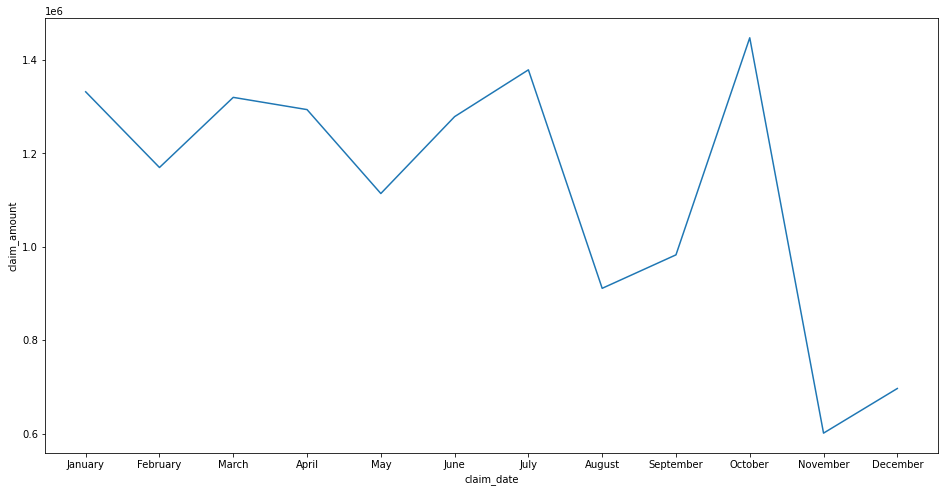

In [60]:
plt.figure(figsize=(16,8))
sns.lineplot(data=monthwise_sum0f_claimamount_sorted, x='claim_date', y='claim_amount')

In [62]:
#15 - What is the average claim amount for gender and age categories and suitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.
avg_fraud_claimamt=cust_claim360[cust_claim360.fraudulent=='Yes'][['gender','age_category', 'claim_amount']].groupby(['gender','age_category']).agg(np.mean).add_prefix('avg_of_fraudulent_').reset_index()
avg_fraud_claimamt

,gender,age_category,avg_of_fraudulent_claim_amount
0,Female,Adult,11600.521978
1,Female,Children,2852.000000
2,Female,Youth,7070.258065
3,Male,Adult,16804.693750
4,Male,Children,2393.700000
5,Male,Youth,10045.814286


In [63]:
avg_nonfraud_claimamt=cust_claim360[cust_claim360.fraudulent=='No'][['gender','age_category', 'claim_amount']].groupby(['gender','age_category']).agg(np.mean).add_prefix('avg_of_non_fraudulent_').reset_index()
avg_nonfraud_claimamt

,gender,age_category,avg_of_non_fraudulent_claim_amount
0,Female,Adult,11749.927798
1,Female,Children,10036.000000
2,Female,Youth,12378.782609
3,Male,Adult,11634.701987
4,Male,Children,15218.333333
5,Male,Youth,11144.615385


In [64]:
import seaborn as sns

<AxesSubplot:xlabel='gender', ylabel='avg_of_non_fraudulent_claim_amount'>

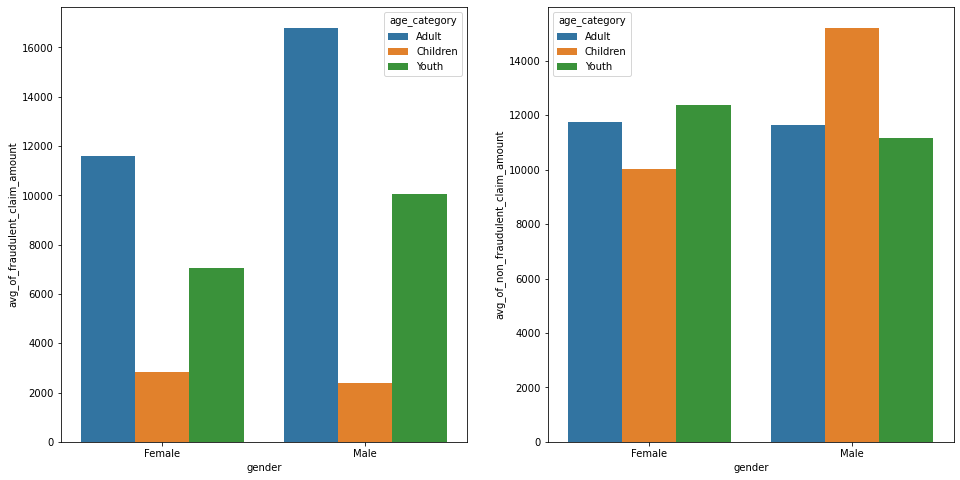

In [65]:
_,axes=plt.subplots(1,2, sharex=False, sharey=False, figsize=(16,8))

sns.barplot(x = "gender", y="avg_of_fraudulent_claim_amount", data=avg_fraud_claimamt, hue="age_category" , ax=axes[0])
sns.barplot(x = "gender", y="avg_of_non_fraudulent_claim_amount", data=avg_nonfraud_claimamt, hue="age_category" , ax=axes[1])

In [84]:
import scipy.stats as stats

In [86]:
#16 - Is there any similarity in the amount claimed by males and females?
cust_claim360[['gender', 'claim_amount']].groupby("gender").agg(np.mean)

,claim_amount
gender,
Female,11502.906072
Male,12174.532668


In [87]:
#total amount claimed by males and total amount claimed by females is similar

In [88]:
#Questions-16: total amount claimed by males and total amount cliamed by females is same or not

#Type of samples: independt samples
#Type of Test: indpendent t-test

#H0: Avg_males = Avg_females
#Ha: Avg_males <> Avg_females

# Function is scipy.stats = stats.ttest_ind

# confidence levels = 95% confidence levels

#p-value<0.05 to reject null hypothesis

In [89]:
m_spend = cust_claim360.claim_amount[cust_claim360.gender=='Male']
f_spend = cust_claim360.claim_amount[cust_claim360.gender=='Female']

In [90]:
print('m_spend_avg: ', m_spend.mean(), 
      'm_spend_std: ', m_spend.std(), 
      'f_spend_avg: ', f_spend.mean(),  
      'f_spend_std: ', f_spend.std()) 

m_spend_avg:  12174.532667876589 m_spend_std:  13849.503014674427 f_spend_avg:  11502.906072106261 f_spend_std:  13361.97256796448


In [91]:
stats.ttest_ind(m_spend, f_spend)

Ttest_indResult(statistic=0.809719120146531, pvalue=0.41828065073320264)

In [92]:
#Conclusion:p>0.05, we can't reject null given the confidnece levels
#Business conclusion: if the sample size is fine, there is similarity in males claim amount & females claim amount 

In [93]:
#Question-17: is there any relationship between age_category & segment

#Type of samples: two independt samples
#objective: find the relaitonship
#Types of variables: both are categorical
#Type of Test: Chisqure test

#H0: S_chisqure = 0
#Ha: S_chisqure<>0

# Function is scipy.stats = stats.chi2_contingency()

# confidence levels = 95% confidence levels

#p-value<0.05 to reject null hypothesis

In [94]:
#17
age_seg_rel=pd.crosstab(cust_claim360.age_category, cust_claim360.Segment, margins=True)
age_seg_rel

Segment,Gold,Platinum,Silver,All
age_category,,,,
Adult,265,245,240,750
Children,10,8,12,30
Youth,96,108,94,298
All,371,361,346,1078


In [95]:
stats.chi2_contingency(age_seg_rel)

(2.4702273497538974,
 0.9816734762057517,
 9,
 array([[ 258.11688312,  251.15955473,  240.72356215,  750.        ],
        [  10.32467532,   10.04638219,    9.62894249,   30.        ],
        [ 102.55844156,   99.79406308,   95.64749536,  298.        ],
        [ 371.        ,  361.        ,  346.        , 1078.        ]]))

In [ ]:
#Conclusion:p>0.05, we can't reject null
#Business conslusion: with 95% confidence, we can conclude that there is no relationship between Segment & age_category


In [ ]:
#18 - The current year has shown a significant rise in claim amounts as compared to 2016-17 fiscal average which was $10,000

#Type of test: one sample t-test/z-test

#Sample: amount claimed by 1085 customers
#hypothetical value: 10000
#H0: S_avg = 10000
#Ha: S_avg <> 10000  ( s_avg_actual>10000 or not)

# Function is scipy.stats = stats.ttest_1samp

# confidence levels = 95% confidence levels

#p-value<0.05 to reject null hypothesis

In [275]:
claim_201718=cust_claim360[((cust_claim360.claim_date>='2017-04-01') & (cust_claim360.claim_date<='2018-03-31'))]
claim_201718

,CUST_ID,gender,DateOfBirth,State,Contact,Segment,claim_id,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,flag,age,age_category
821,12377926,Male,1999-11-11,MS,735-517-7849,Silver,32299664,12377926,Driver error,2018-03-28,Home,Yes,Injury only,14480.0,1.0,No,0,19,Youth
411,79953263,Male,1967-01-14,ID,685-954-6532,Platinum,75954321,79953263,Other causes,2018-03-28,Auto,Yes,Injury only,32680.0,1.0,No,0,52,Adult
359,51613894,Male,1988-01-02,MO,675-213-7462,Silver,41063309,51613894,Other causes,2018-03-28,Home,Unknown,Material and injury,1630.0,1.0,No,0,31,Adult
642,88200222,Female,1966-09-15,NM,234-625-7536,Silver,86506515,88200222,Crime,2018-03-28,Auto,Unknown,Material only,1780.0,1.0,No,0,52,Adult
487,31115028,Female,1965-10-16,NE,321-243-9564,Silver,5182265,31115028,Other driver error,2018-03-28,Auto,Unknown,Material only,2600.0,1.0,No,0,53,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
690,57043846,Male,1996-12-24,RI,756-197-4972,Silver,38818122,57043846,Other causes,2017-04-05,Auto,Yes,Injury only,34490.0,1.0,No,0,22,Youth
290,55535045,Male,1994-08-11,AR,164-539-3948,Gold,95437929,55535045,Driver error,2017-04-05,Auto,No,Material only,1110.0,1.0,No,0,24,Youth
384,31654316,Female,1981-07-12,IN,683-351-1463,Gold,67359535,31654316,Other driver error,2017-04-05,Home,Unknown,Material and injury,35800.0,3.0,No,0,37,Adult
394,57896241,Male,1996-09-11,VT,678-356-9671,Silver,11113092,57896241,Driver error,2017-04-05,Auto,Unknown,Material and injury,30420.0,1.0,No,0,22,Youth


In [277]:
claim_201718.claim_amount.mean()

12349.810526315789

In [276]:
stats.ttest_1samp(claim_201718.claim_amount, popmean=10000)

Ttest_1sampResult(statistic=4.0217096445024625, pvalue=6.55704993760832e-05)

In [ ]:
#Conclusion:p<0.0.5 We can reject null hypothesis and  accept alternative hypothesis i.e Last year average is different from 2017-18 fiscal year average
#Business coclusion: 2017-18 fiscal year claim amount has significantly increased from 10000 (which was 2016-17 fiscal year average)

In [ ]:
#Question-19: Is there any difference between age groups and insurance claims?

#Type of samples: multiple independt samples
#Type of Test: f-test

#H0: Avg_s1= Avg_s2 =Avg_s3
#Ha: one of age_category average is different from others

# Function is scipy.stats = stats.f_1way

# confidence levels = 95% confidence levels

#p-value<0.05 to reject null hypothesis

In [265]:
#19
Children=cust_claim360.claim_amount[cust_claim360.age_category=='Children']
Adult=cust_claim360.claim_amount[cust_claim360.age_category=='Adult']
Youth=cust_claim360.claim_amount[cust_claim360.age_category=='Youth']

In [269]:
print('Children_avg: ', Children.mean(), 
      'Children_std: ', Children.std(), 
      'Youth_avg: ', Youth.mean(),  
      'Youth_std: ', Youth.std(),
      'Adult_avg: ', Adult.mean(),  
      'Adult_std: ', Adult.std())

Children_avg:  10116.816666666668 Children_std:  13006.198871866454 Youth_avg:  11067.991610738254 Youth_std:  13279.605562023522 Adult_avg:  12224.577333333333 Adult_std:  13762.771019512516


In [270]:
stats.f_oneway(Children, Youth, Adult)

F_onewayResult(statistic=1.0190437208887164, pvalue=0.3612883304927132)

In [ ]:
#Conclusion:p>0.05, we can't reject null hypothesis with 95% confidence levels
#Business conclusion : with 95% confidence we can say that there is no difference between age_category and claim i.e there is no influence of age_category on insurance claim

In [ ]:
#20 - Is there any relationship between total number of policy claims and the claimed amount?

# Question-20: Relationship between total policy claims and claim amount

#Type of samples: two independt samples
#objective: find the relaitonship
#Types of variables: both are numerical
#Type of Test: correlation test

#H0: S_corr = 0
#Ha: S_corr<>0

# Function is scipy.stats = stats.pearsonr()

# confidence levels = 95% confidence levels

#p-value<0.05 to reject null hypothesis

In [70]:
cust_claim360[['total_policy_claims', 'claim_amount']].corr()

,total_policy_claims,claim_amount
total_policy_claims,1.000000,-0.020097
claim_amount,-0.020097,1.000000


In [72]:
sns.scatterplot?

<AxesSubplot:xlabel='total_policy_claims', ylabel='claim_amount'>

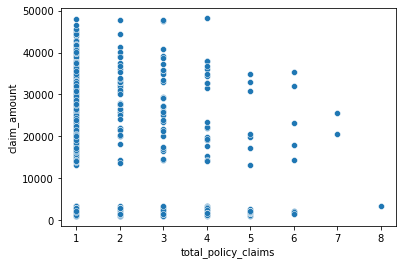

In [81]:
sns.scatterplot(data=cust_claim360, x="total_policy_claims", y="claim_amount")

In [272]:
stats.pearsonr(cust_claim360.total_policy_claims, cust_claim360.claim_amount)

(-0.02009690583917584, 0.5098052645736887)

In [ ]:
# conclusion: pvalue>0.05, so we can't reject null
#buisness conclusion: there is no relationship between total_policy_claims & claim_amount
# Relationship : negative